In [680]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [682]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

In [683]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Downloads/Sports-celebrity images",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 441 files belonging to 4 classes.


In [684]:
class_names = dataset.class_names
class_names

['Kane Williamson', 'Kobe Bryant', 'Maria Sharapova', 'Ronaldo']

In [685]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())


(32, 256, 256, 3)
[1 0 0 2 0 1 3 3 3 2 1 2 3 1 1 1 1 0 3 3 1 2 1 2 3 1 3 0 1 1 1 3]


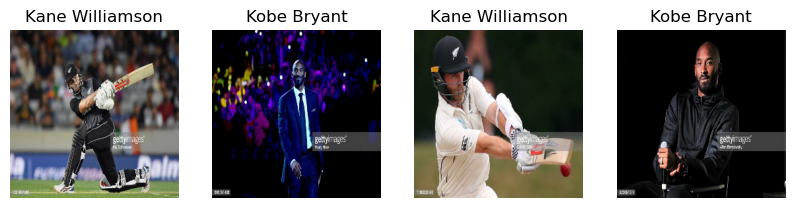

In [686]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(4):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [687]:
len(dataset)


14

In [688]:
def get_dataset_partitions_tf(ds, train_split=0.8, test_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)    
    test_ds = ds.skip(train_size).take(test_size)
    
    return train_ds, test_ds

In [689]:
train_ds, test_ds = get_dataset_partitions_tf(dataset)


In [690]:
len(train_ds)


11

In [691]:
len(test_ds)


2

In [692]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [693]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [694]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [695]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [696]:
model = models.Sequential([
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [697]:
model.summary()


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_96 (Conv2D)                   │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_96 (MaxPooling2D)      │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_97 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_98 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_98 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_99 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_100 (Conv2D)                  │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_100 (MaxPooling2D)     │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_101 (MaxPooling2D)     │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,124 (473.14 KB)

 Trainable params: 121,124 (473.14 KB)

 Non-trainable params: 0 (0.00 B)

In [698]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [738]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    verbose=1,
    epochs=200,
)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7401 - loss: 0.6628
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7396 - loss: 0.7053
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7464 - loss: 0.5768
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7310 - loss: 0.6990
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7022 - loss: 0.8380
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6811 - loss: 0.8013
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7315 - loss: 0.7421
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7300 - loss: 0.6282
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7485 - loss: 0.6285
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7644 - loss: 0.5649
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7668 - loss: 0.5684
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy:

In [739]:
scores = model.evaluate(test_ds)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - accuracy: 0.9062 - loss: 0.7812


In [742]:
scores


[0.7559990286827087, 0.890625]

In [744]:
history


In [746]:
history.params


{'verbose': 1, 'epochs': 200, 'steps': 11}

In [748]:
history.history.keys()


dict_keys(['accuracy', 'loss'])

In [750]:
type(history.history['loss'])


list

In [752]:
len(history.history['loss'])


200

In [754]:
history.history['loss'][:5]

[0.7011431455612183,
 0.6614853739738464,
 0.5906415581703186,
 0.6402280926704407,
 0.7799287438392639]

In [756]:
acc = history.history['accuracy']

loss = history.history['loss']


first image to predict
actual label: Kane Williamson
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
predicted label: Kane Williamson


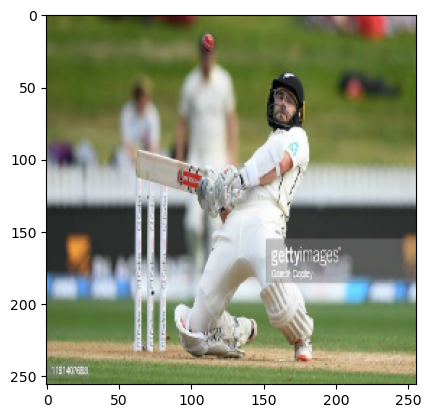

In [758]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [759]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


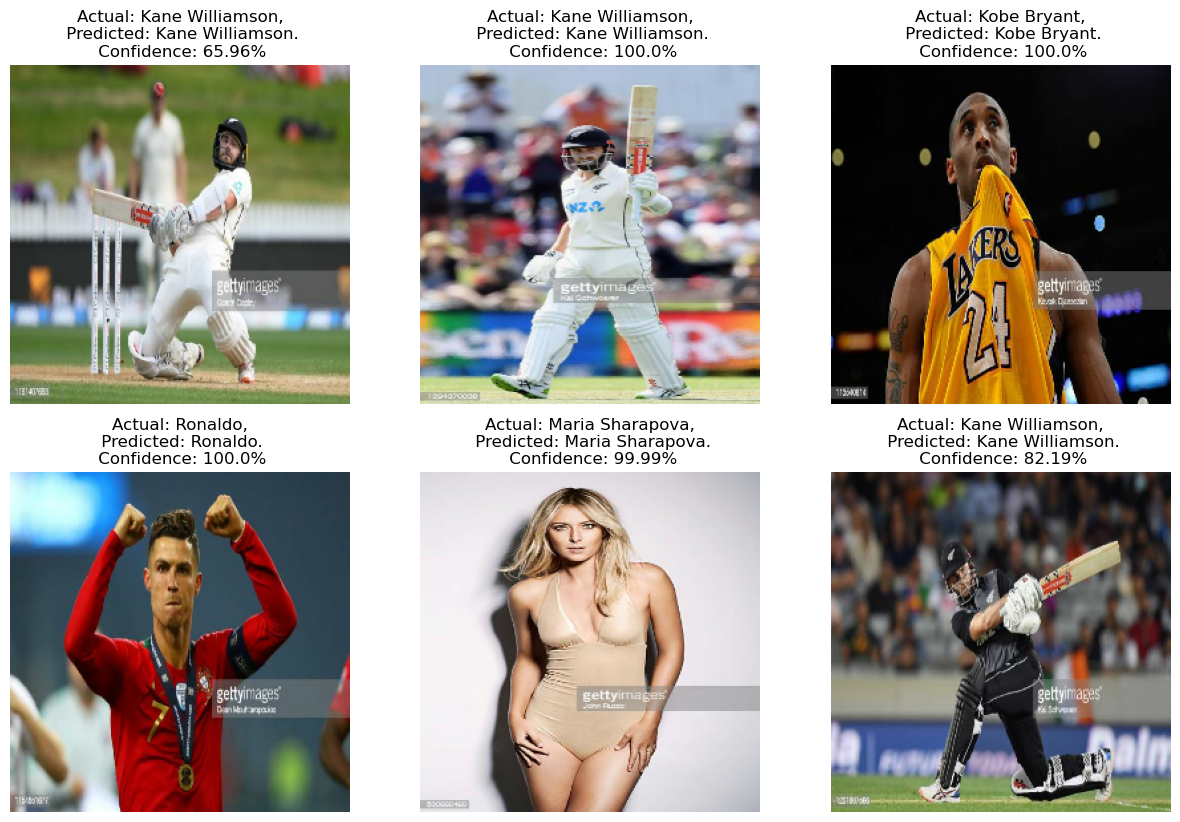

In [762]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")